(array([320., 670., 558., 489., 397., 296., 234., 250., 167., 143., 136.,
        122., 130., 110.,  92.,  91.,  66.,  62.,  61.,  44.,  49.,  30.,
         36.,  28.,  25.,  24.,  25.,  18.,  20.,  22.,  15.,  18.,  17.,
         15.,  15.,  17.,  15.,   8.,  14.,   8.,  10.,   9.,   5.,   9.,
          3.,   7.,   6.,   2.,   3.,   5.,   3.,   4.,   1.,   4.,   1.,
          2.,   4.,   1.,   1.,   2.,   0.,   3.,   2.,   1.,   3.,   1.,
          1.,   2.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
         33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
         66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
         99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
        132., 135., 13

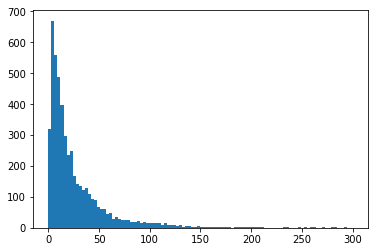

In [128]:
# Question 1


# qustion 1(a)
# Build a network based on the date
import networkx as nx
import matplotlib.pyplot as plt

ppi = nx.Graph()

file = open("ppi/confidence.ppi","r")
f = file.readline()


while f:
    line = f.split()
    ppi.add_edge(line[0],line[1])
    f = file.readline()

Degree = [ppi.degree(node) for node in ppi]
plt.hist(Degree,bins=100,range=(0,300))
# print(max(Degree))


# print(ppi['YNR016C'])



In [2]:
# qustion 1(b)
clustering = open("clustering.txt","w+")
for node in ppi.nodes:
    clustering.write(node)
    clustering.write('\t')
    clustering.write(str(nx.clustering(ppi,node)))
    clustering.write('\n')
clustering.close()

print(nx.clustering(ppi,'YGR296W'))
print(nx.clustering(ppi,'YPL098C'))

# A higher clustering coefficient means most of the neighbors of 'YPL098C' interact with each other(forms an edge)




0.1
0.8


In [3]:
# qustion 1(c)
def count_three_clique(network):
    number_of_triangles = 0
    for i in network.nodes:
        neighbors = [key for key in network[i]]
        for j in neighbors:
            for k in neighbors:
                if network.has_edge(j,k):
                    number_of_triangles += 1
    return number_of_triangles

def path_length_two(network):
    path = 0
    for i in network:
        n = len(network[i])
        path += n*(n-1)
    return path

def global_clustering_coefficient(network):
    return count_three_clique(network)/path_length_two(network)

print(count_three_clique(ppi))
print(global_clustering_coefficient(ppi))
print(nx.transitivity(ppi))

2127084
0.06521162897857237
0.06521162897857237


(array([ 33., 803., 162.,   0.,   0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

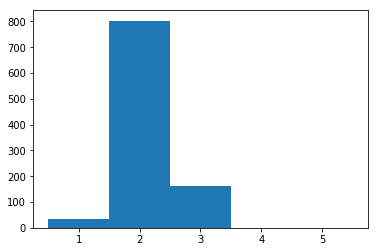

In [4]:
# qustion 1(d)
import random

shortest_length = []
L = list(ppi.nodes)

for trials in range(1000):
    i = L[random.randrange(1000)]
    j = L[random.randrange(1000)]
    shortest_length.append(len(nx.shortest_path(ppi,i,j))-1)


plt.hist(shortest_length,bins=5,range=(0.5,5.5))


# The shortest path distances is far smaller than I expected
# I was thinking the nodes would be quite separate from each other since there are a huge number of nodes
# But the experiment result show that there is no two nodes separated by more than 3 edges


In [5]:
# print(nx.diameter(ppi))







In [143]:

# Question 2 starts her,
# This part is I try to use majority vote method on the whole network
print(list(ppi.neighbors('YNL079C')))

Mips = open("ppi/MIPSFirstLevel.anno3","r")
l = Mips.readline()

labels = {}
while l:
    line = l.split()
    if len(line) > 1:
        labels[line[0]] = line[1:]
    else:
        labels[line[0]] = None
    
    l = Mips.readline()

votes = {}
for i in ppi.nodes:
    for j in ppi.neighbors(i):
        if j in votes:
            votes_on_j = votes[j]
        else:
            votes_on_j = {}
        if labels[i] is not None:
            for k in labels[i]:
                if k not in votes_on_j:
                    votes_on_j[k] = 1
                else:
                    votes_on_j[k] += 1
            votes[j] = votes_on_j
votes['YNL204C'] = None
            
def find_label(d):
    if d is None:
        return None
    if d == {}:
        return None
    max_val = max([val for key, val in d.items()])
    max_key = [key for key in d if d[key] == max_val]
    max_key = min(max_key)
    return max_key

vote_result = {}
for i in ppi.nodes:
    vote_result[i] = votes[i]
    vote_result[i] = find_label(votes[i])

#print(votes['YNL079C'])
print(vote_result['YDR143C'])



['YDL160C', 'YLR109W', 'YBR109C', 'YBR011C', 'YFL039C', 'YGR254W', 'YKR097W', 'YDR050C', 'YBR218C', 'YGL122C', 'YNL031C', 'YPL240C', 'YDL072C', 'YJR072C', 'YFR004W', 'YOL068C', 'YLL050C', 'YIL138C', 'YHL034C', 'YCL037C', 'YLL039C', 'YML028W', 'YNL255C']
16


In [183]:
# question 2(a)

def Majority_Vote(node,testset):
    votes = {}
    for node2 in testset:
        if ppi.has_edge(node,node2):
            if labels[node2] is None:
                continue
            for i in labels[node2]:
                if i not in votes:
                    votes[i] = 0
                votes[i] += 1
    return find_label(votes)

# compared with result above we know that this algorithm gives correct result
Majority_Vote('YDR143C',ppi.nodes)


'16'

In [184]:
# question 2(b)
def My_algorithm(node,testset):
    votes = []
    for node2 in testset:
        if ppi.has_edge(node,node2):
            if labels[node2] is None:
                continue
            for i in labels[node2]:
                if i not in votes:
                    votes.append(i)
                else:
                    return i
    if len(votes) > 1:
        return votes[0]
    else:
        return None

# compared with result above we know that this algorithm gives correct result
My_algorithm('YDR143C',ppi.nodes)





'01'

In [211]:
# question 2(c), generating dataset
l = list(ppi.nodes)

testset = []
testset.append([l[i] for i in range(1000)])
testset.append([l[i+1000] for i in range(1000)])
testset.append([l[i+2000] for i in range(1000)])
testset.append([l[i+3000] for i in range(1000)])
testset.append([l[i+4000] for i in range(1001)])
dataset = []
dataset.append([l[i] for i in range(5001) if l[i] not in testset[0] ])
dataset.append([l[i] for i in range(5001) if l[i] not in testset[1] ])
dataset.append([l[i] for i in range(5001) if l[i] not in testset[2] ])
dataset.append([l[i] for i in range(5001) if l[i] not in testset[3] ])
dataset.append([l[i] for i in range(5001) if l[i] not in testset[4] ])


# performace_majority_vote = 0
# performace_my_algo = 0
# test = testset[0]
# dataset = dataset[0]
# for node in test:
#     i = Majority_Vote(node,data)
#     j = My_algorithm(node,data)
#     if labels[node] is None:
#         continue
#     if i in labels[node]:
#         performace_majority_vote += 1
#     if j in labels[node]:
#         performace_my_algo += 1
        
# test performace
performace_majority_vote = 0
performace_my_algo = 0

for i in range(5):
    test = testset[i]
    data = dataset[i]
    for node in test:
        i = Majority_Vote(node,data)
        j = My_algorithm(node,data)
        if labels[node] is None:
            continue
        if i in labels[node]:
            performace_majority_vote += 1
        if j in labels[node]:
            performace_my_algo += 1

print(performace_majority_vote)
print(performace_my_algo)
    
    
    
    
 

2287
1467


In [172]:
test1 = nx.Graph()
test1.add_edge(1,2)
test1.add_edge(3,2)
test1.add_edge(1,3)
test1.add_edge(1,4)
test1.add_edge(2,4)

print(test1.edges)
for i in test1.edges:
    print(i[0])


[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]
1
1
1
2
2
